In [5]:
import pandas as pd
from pandas import Series, DataFrame as df
import json
import csv
import datetime
import os

### 전체 데이터 output 양식:
- output: date, text

### 뉴스데이터 전처리: 
- 뉴스 데이터 형식: '기사제목', '입력일', '기사내용' 형식으로 구성이 되어 있음 = >line[0]:기사제목, line[1]:입력일, line[2]:기사내용
- 뉴스 날짜: '2019.09.01.'형식으로 되어 있어서 '2019-09-01'로 수정하였음 
- 최종 output: date - 기사 입력일, text - 기사제목+기사내용

### 트립어드바이저 리뷰 데이터 전처리:
- 데이터 형식:'date', 'title', 'review' => line[0]:date, line[1]:, title, line[2]: review
- 최종 output: date - date, text - title+review

In [99]:
csv_dict_list = list()

In [100]:
filename = "뉴스리플리에게"

In [101]:

with open(os.path.join("./text_datas/2019/",filename +".csv"), 'r',encoding='UTF-8') as f:
    csv_data = csv.reader(f, delimiter=',')
   
    for line in csv_data:
        if '입력일' not in line[1]: 
            line[1]=line[1].replace(".","")
            print(line[0])
            date = datetime.datetime.strptime(line[1],'%Y%m%d')
            csv_dict_list.append({'date':date.strftime('%Y-%m-%d'),'text':line[0]+line[2]}) #뉴스 데이터 전처리 코드 
            #csv_dict_list.append({'date':line[0],'text':line[1]}) #리뷰 데이터 전처리 코드

일상을 조명하는 예술...일상을 소재로 삼은 2월 전시
[CULTURE] 30년 전 뜨거웠던 때, 올림픽 조각 프로젝트


In [102]:
#news data to pandas dataframe
pd_news_data = pd.DataFrame(csv_dict_list)

In [103]:
pd_news_data.head()

,date,text
0,2019-01-22,"일상을 조명하는 예술...일상을 소재로 삼은 2월 전시전시 '뉴스, 리플리에게', ..."
1,2019-01-01,"[CULTURE] 30년 전 뜨거웠던 때, 올림픽 조각 프로젝트다른 두 세계의 묘한..."


### 인스타그램 이미지 캡셔닝 결과 데이터 전처리:
- json 파일 형식: {"전시이름":[{"file_name":파일 이름, "caption":이미지 캡션}]}
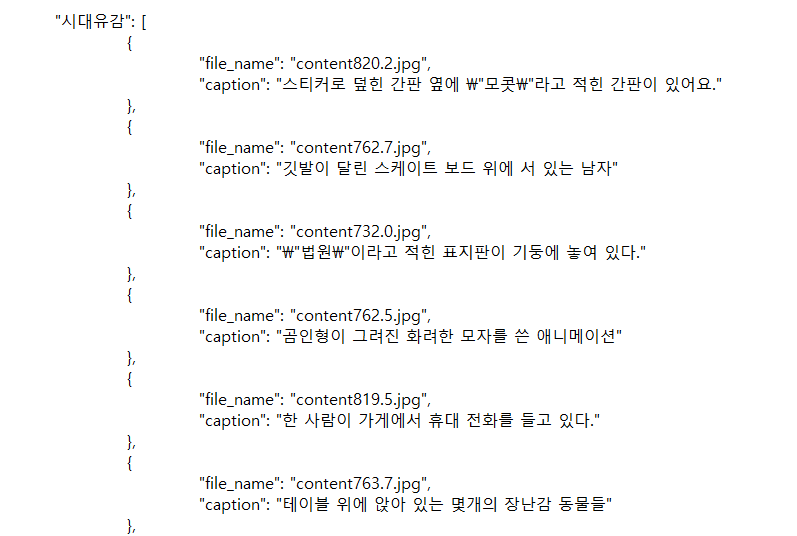

(일부 파일들이 파일 이름이 파일이름과 전시 이름이 동일하지 않기 때문에, 파일이름을 수정하거나 수작업으로 해야할 가능성이 있음)

In [76]:
#이미지캡셔닝데이터로드
caption_data = open(os.path.join('.','imagecaptioning','2019',filename+".json"),"r",encoding='UTF8') 
data = json.load(caption_data)
pd_caption_data = pd.DataFrame(data[filename]) 

In [77]:
pd_caption_data.head()

,file_name,caption
0,content109.3.jpg,Tv앞에 서 있는 남자
1,content76.2.jpg,텔레비전 화면에 대한 근접 촬영
2,content69.2.jpg,Tv앞에 서 있는 한 무리의 사람들
3,content21.jpg,벽에 걸린 그림의 그림
4,content94.2.jpg,금속 막대기 위에 거꾸로 매달려 있는 추상적인 사인이 있다.


### 인스타그램 데이터 로드
- 데이터형식: {"포스트 숫자"{"date":포스팅날짜,"hashtag":[listofhashtag],"text":포스트텍스트,"name:[포스트의 이미지 리스트]}
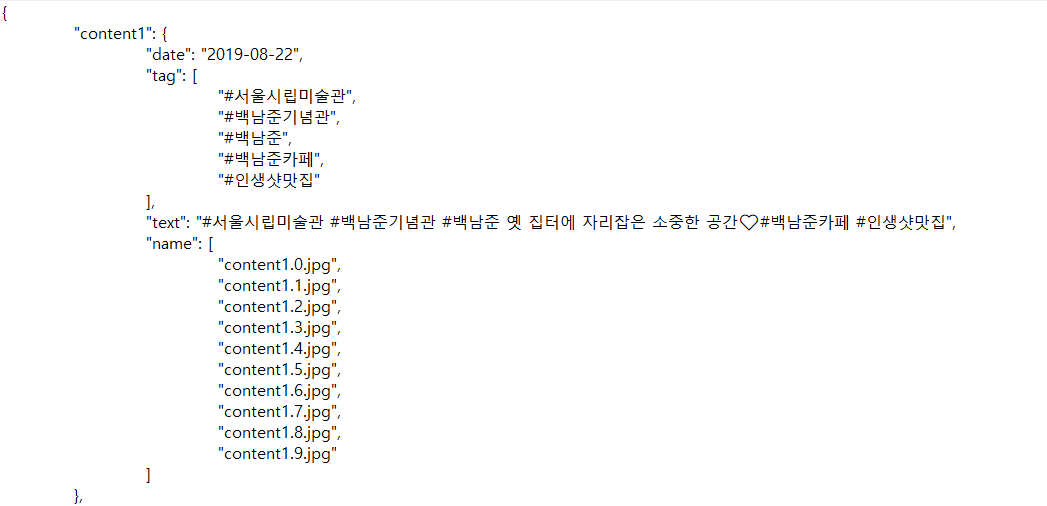

- pandas data output: 'date':인스타 포스팅 날짜, 'file_name':각 포스트에 있는 파일 이름, 'text': 포스트에 있는 텍스트 로 저장 
(추후에 이미지 캡셔닝 데이터와 합치기 위함임)

In [89]:
#인스타그램데이터로드
instagram_data = open(os.path.join('.','instagram','2019',filename+'.json'),"r",encoding='UTF8') 
json_insta_data = json.load(instagram_data)

In [90]:
json_insta_list = list()
for idx,element in enumerate(json_insta_data.keys()):
    for file_name in json_insta_data[element]['name']:
        json_insta_list.append({'date':json_insta_data[element]['date'],'file_name':file_name,'text':json_insta_data[element]['text']})

In [91]:
pd_insta_data = pd.DataFrame(json_insta_list)

In [92]:
pd_insta_data.head()

,date,file_name,text
0,2018-11-20,content1.jpg,잠깐 쉴까요 #뉴스리플리에게 #이다은 #북서울미술관
1,2018-11-14,content3.0.jpg,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...
2,2018-11-14,content3.1.jpg,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...
3,2018-11-14,content3.2.jpg,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...
4,2018-11-14,content3.3.jpg,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...


In [93]:
## 인스타그램 데이터 & 이미지 캡셔닝 데이터 Join
insta_and_captioning=pd_insta_data.join(pd_caption_data.set_index('file_name'), on='file_name')

In [94]:
#Join된 데이터에서 date, caption만 추출 
insta_caption=insta_and_captioning[['date','caption']]

In [95]:
#caption column => text column으로 rename
pd_caption = insta_caption.rename(columns={"date":"date","caption":"text"})

In [96]:
#instagram data에서 date, text 추출
pd_insta_data = pd_insta_data[['date','text']]

In [104]:
#news data, insta data, caption data 합침 (주석처리된 부분은 일부 데이터는 news data가 존재하지 않기 때문 )
final_result = pd.concat([pd_news_data,pd_insta_data,pd_caption])
#final_result = pd.concat([pd_insta_data,pd_caption])

In [105]:
final_result.head()

,date,text
0,2019-01-22,"일상을 조명하는 예술...일상을 소재로 삼은 2월 전시전시 '뉴스, 리플리에게', ..."
1,2019-01-01,"[CULTURE] 30년 전 뜨거웠던 때, 올림픽 조각 프로젝트다른 두 세계의 묘한..."
0,2018-11-20,잠깐 쉴까요 #뉴스리플리에게 #이다은 #북서울미술관
1,2018-11-14,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...
2,2018-11-14,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...


In [106]:
#중복 data, NaN data 삭제 
final_result = final_result.drop_duplicates()
final_result = final_result.dropna()


In [107]:
final_result.head()

,date,text
0,2019-01-22,"일상을 조명하는 예술...일상을 소재로 삼은 2월 전시전시 '뉴스, 리플리에게', ..."
1,2019-01-01,"[CULTURE] 30년 전 뜨거웠던 때, 올림픽 조각 프로젝트다른 두 세계의 묘한..."
0,2018-11-20,잠깐 쉴까요 #뉴스리플리에게 #이다은 #북서울미술관
1,2018-11-14,가짜뉴스의 생산과 뉴스의 진실성 그리고 과거와 미래까지➰ 도슨트의 설명과 뭔지 모르...
8,2019-01-06,꼭!!!! #북서울미술관 #서울사진축제 #뉴스리플리에게


In [110]:
#데이터 csv로 저장
final_result[final_result['text'].isnull()==False].to_csv(os.path.join('.','total_datas',filename+'.csv'),index=False)

## 전시별 데이터 통합

In [111]:
from glob import glob

In [113]:
article_list=[]

files = glob('./total_datas/*.csv')

In [114]:
with open('./text_datas/total_datas.csv', 'w', encoding='UTF8' ,newline='') as fw:
    filewriter=csv.writer(fw)
    filewriter.writerow(['date','text'])
    for filename in files:
        print(filename)
        with open(filename, encoding='UTF8') as fr:
            rdr = csv.reader(fr)
            for line in rdr:
                filewriter.writerow([line[0],line[1]])

./total_datas\2017서울포커스.csv
./total_datas\2018SeMA신소장작품.csv
./total_datas\2018서울미디어시티비엔날레.csv
./total_datas\2018서울사진축제.csv
./total_datas\2018서울포커스.csv
./total_datas\2018타이틀매치.csv
./total_datas\2019서울사진축제.csv
./total_datas\2019서울포커스.csv
./total_datas\2019타이틀매치.csv
./total_datas\가나아트.csv
./total_datas\강박.csv
./total_datas\경계155.csv
./total_datas\고향.csv
./total_datas\날씨의맛.csv
./total_datas\남서울.csv
./total_datas\뉴스리플리에게.csv
./total_datas\더불어평화.csv
./total_datas\데이비드호크니.csv
./total_datas\두개의기둥과일곱개의글자.csv
./total_datas\두번째풍경.csv
./total_datas\디지털프롬나드.csv
./total_datas\레안드로에를리치.csv
./total_datas\망각에부치는노래.csv
./total_datas\모던로즈.csv
./total_datas\모두를위한세계.csv
./total_datas\미래과거를위한일.csv
./total_datas\백남준기념관.csv
./total_datas\벌집도시와소리숨바꼭질.csv
./total_datas\보이스리스.csv
./total_datas\불안한사물들.csv
./total_datas\사각생각삼각.csv
./total_datas\세마벙커.csv
./total_datas\소프트카오스.csv
./total_datas\시대유감.csv
./total_datas\씨실과날실로.csv
./total_datas\안은미래.csv
./total_datas\에이징월드.csv
./total_datas\영원한나르시스트천경자.csv
./total_datas